## Paso 1. Acceso y preparacion de los datos.

In [19]:
# Importar librerías necesarias
import pandas as pd

# Cargar los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Vista rápida de cada dataset
print('--- Visits ---')
print(visits.info())
print('\n--- Orders ---')
print(orders.info())
print('\n--- Costs ---')
print(costs.info())


--- Visits ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

--- Orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

--- Costs ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null 

#### Limpieza de los datos.

In [20]:
# Convertir columnas de fechas a tipo datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

# Renombrar columnas para que tengan nombres más consistentes
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'dt', 'costs']

# Verificar cambios
print('--- Visits ---')
print(visits.info())
print('\n--- Orders ---')
print(orders.info())
print('\n--- Costs ---')
print(costs.info())


--- Visits ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None

--- Orders ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

--- Costs ---
<class 'pandas

## Paso 2. Informes y metricas.

1. Vistas


### a. ¿Cuántas personas lo usan cada día, semana y mes?

In [7]:
# Agregamos una columna de fecha (sin hora) para facilitar agrupaciones
visits['date'] = visits['start_ts'].dt.date

# Usuarios únicos por día
daily_users = visits.groupby('date')['uid'].nunique()

# Usuarios únicos por semana
visits['week'] = visits['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_users = visits.groupby('week')['uid'].nunique()

# Usuarios únicos por mes
visits['month'] = visits['start_ts'].dt.to_period('M').astype(str)
monthly_users = visits.groupby('month')['uid'].nunique()

# Mostrar resultados
print("Usuarios únicos por día:\n", daily_users.head())
print("\nUsuarios únicos por semana:\n", weekly_users.head())
print("\nUsuarios únicos por mes:\n", monthly_users.head())


Usuarios únicos por día:
 date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuarios únicos por semana:
 week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: uid, dtype: int64

Usuarios únicos por mes:
 month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: uid, dtype: int64


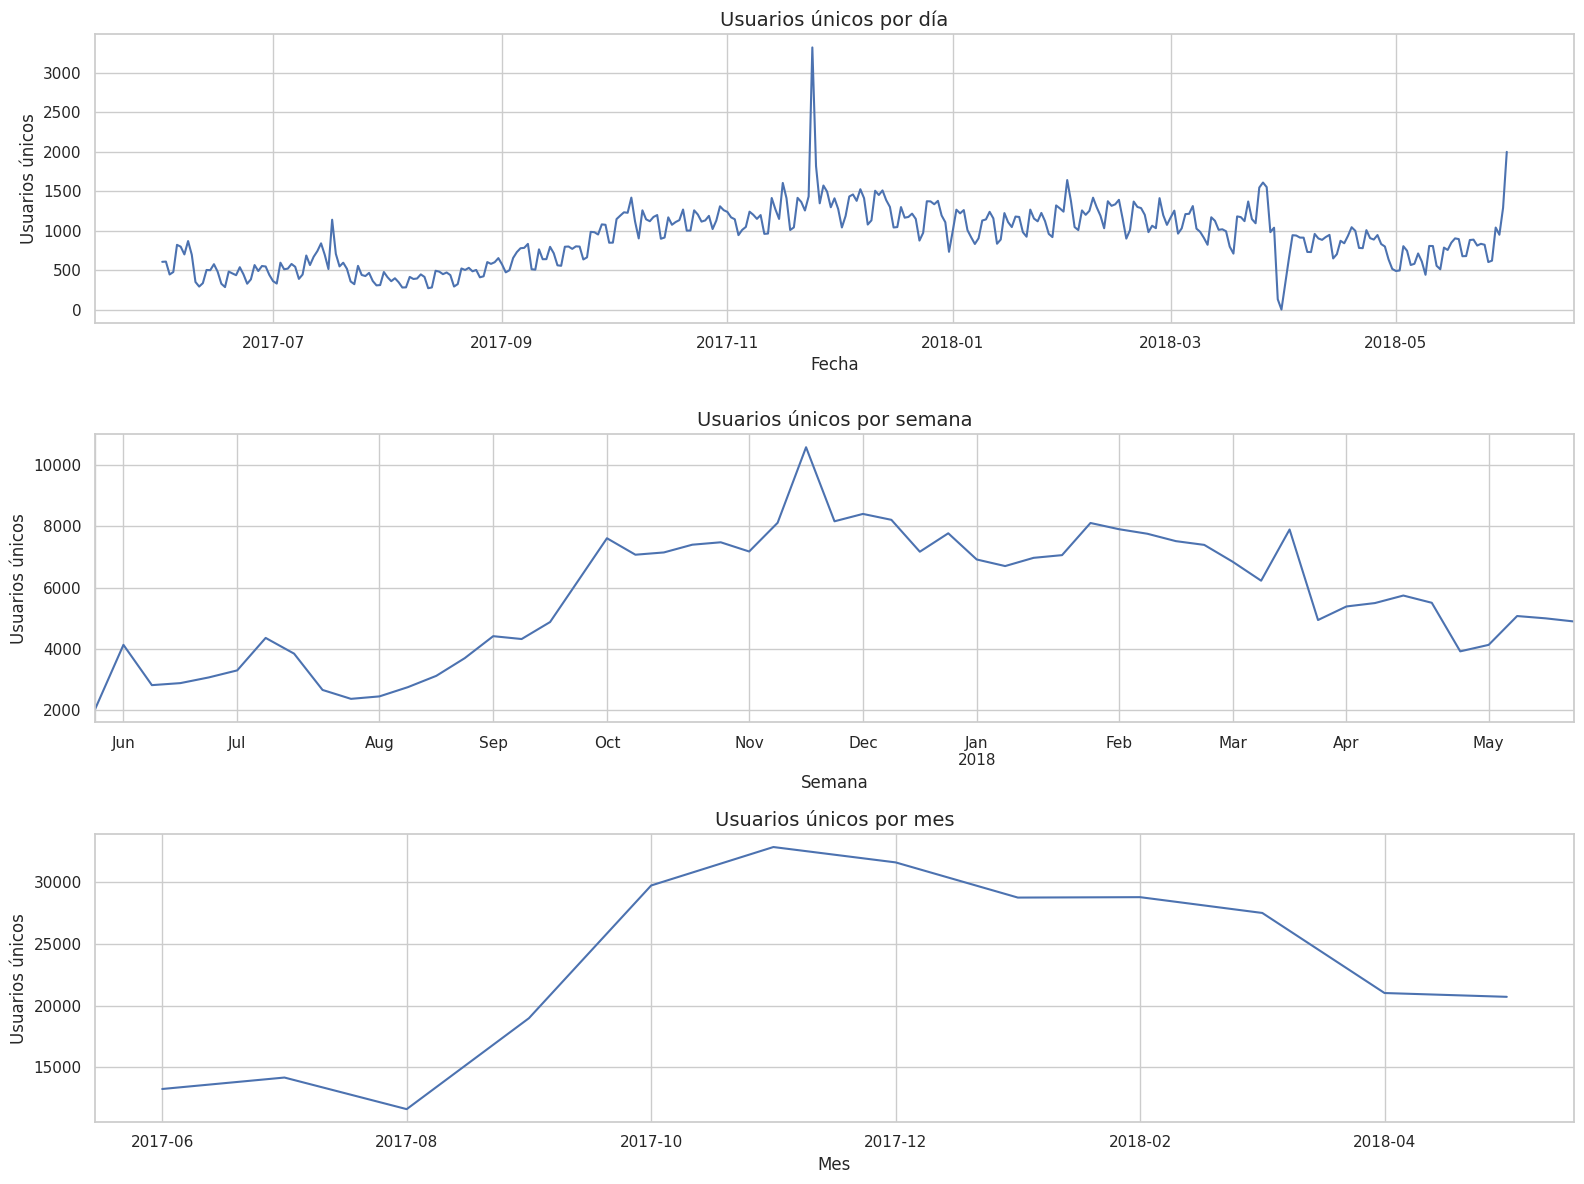

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Gráfico de usuarios diarios
plt.subplot(3, 1, 1)
daily_users.plot()
plt.title('Usuarios únicos por día', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos')

# Gráfico de usuarios semanales
plt.subplot(3, 1, 2)
weekly_users.plot()
plt.title('Usuarios únicos por semana', fontsize=14)
plt.xlabel('Semana')
plt.ylabel('Usuarios únicos')

# Gráfico de usuarios mensuales
plt.subplot(3, 1, 3)
monthly_users.plot()
plt.title('Usuarios únicos por mes', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')

plt.tight_layout()
plt.show()


### Análisis de usuarios únicos

Al revisar los gráficos de usuarios únicos por día, semana y mes, se pueden notar varias cosas interesantes.

A nivel diario, hay bastante variación: algunos días tienen muchos más usuarios que otros, lo cual podría estar relacionado con fines de semana, campañas puntuales o incluso feriados.

En la vista semanal, el comportamiento se ve un poco más estable, pero siguen apareciendo subidas y bajadas que podrían darnos pistas sobre tendencias de uso.

En el gráfico mensual se ve más claro si el sitio está creciendo o si hay meses en los que baja la actividad. Esto nos ayuda a tener una idea general del comportamiento de los usuarios a lo largo del tiempo.

Este primer análisis ya nos da una base para entender cómo se comportan los usuarios y más adelante podremos compararlo con los datos de marketing.

### b. ¿Cuántas sesiones hay por día? 

In [10]:
# Contar sesiones por día usando la columna 'date' que ya creamos antes
sessions_per_day = visits.groupby('date').size()

print("Sesiones por día:\n", sessions_per_day.head())


Sesiones por día:
 date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64


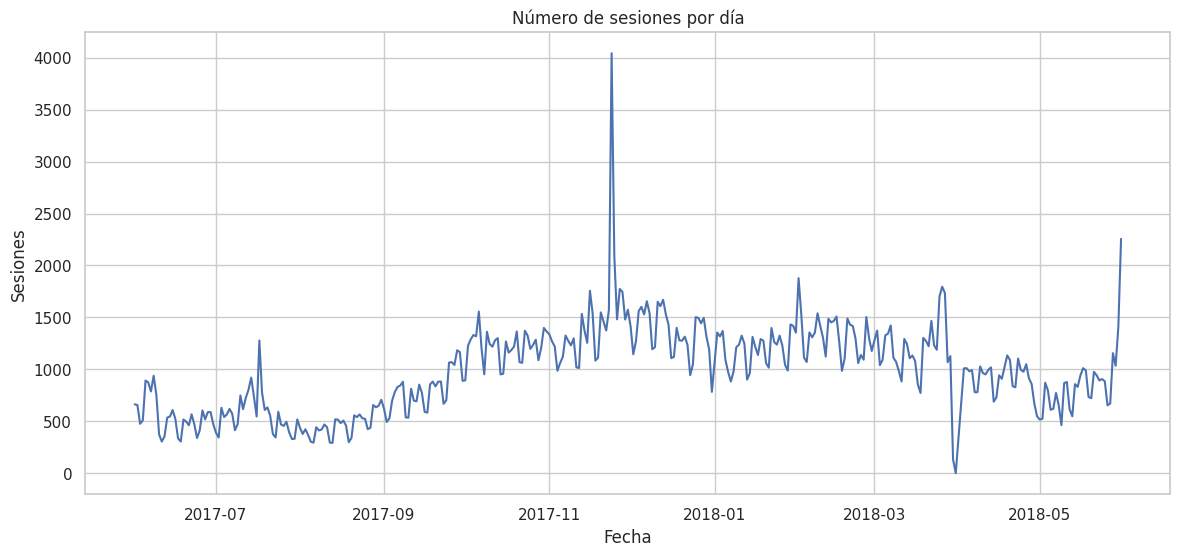

In [11]:
plt.figure(figsize=(14,6))
sessions_per_day.plot()
plt.title('Número de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.show()


## Análisis de sesiones por día

Al contar las sesiones diarias, vemos que algunos días tienen muchas más sesiones que otros, lo que puede deberse a campañas, eventos o simplemente a la actividad normal del sitio.

Este dato es importante porque nos muestra el volumen total de interacción, sin importar si un mismo usuario entra varias veces. Así podemos entender mejor la demanda y los picos de uso.

### c. ¿Cuál es la duración de cada sesión?


In [12]:
# Calcular duración en segundos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

# Revisar estadísticas básicas
print(visits['session_duration'].describe())


count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64


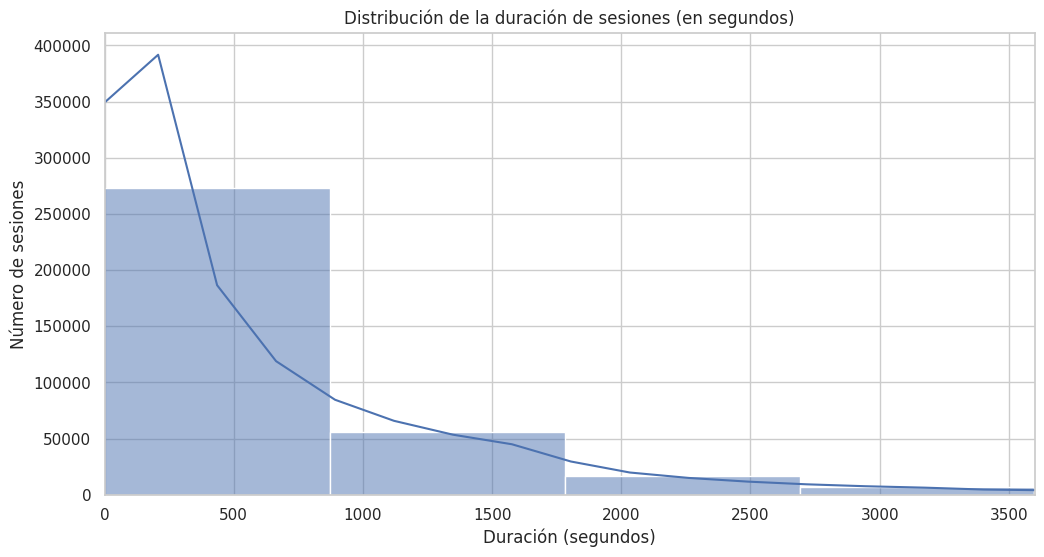

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(visits['session_duration'], bins=50, kde=True)
plt.title('Distribución de la duración de sesiones (en segundos)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Número de sesiones')
plt.xlim(0, 3600)  # Limitamos a 1 hora para mejor visualización
plt.show()


### Análisis de duración de las sesiones

Calculé cuánto duran las sesiones y encontré que la mayoría son relativamente cortas, la mayoría duran menos de una hora. 

Esto tiene sentido porque la gente suele visitar para buscar o comprar entradas rápido, aunque hay algunas sesiones más largas que pueden ser exploraciones más detalladas.

Conocer la duración promedio nos ayuda a entender cómo interactúan los usuarios con la plataforma y a detectar posibles áreas para mejorar la experiencia.

### d. ¿Cuál es la duración de cada sesión?

In [15]:
# Ordenar por usuario y fecha de inicio
visits_sorted = visits.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia de tiempo entre sesiones consecutivas por usuario
visits_sorted['time_since_last_session'] = visits_sorted.groupby('uid')['start_ts'].diff()

# Revisar las primeras diferencias
print(visits_sorted[['uid', 'start_ts', 'time_since_last_session']].head(10))


                    uid            start_ts time_since_last_session
196543   11863502262781 2018-03-01 17:27:00                     NaT
257333   49537067089222 2018-02-06 15:55:00                     NaT
173818  297729379853735 2017-06-07 18:47:00                     NaT
173142  313578113262317 2017-09-18 22:49:00                     NaT
192554  313578113262317 2018-02-18 15:17:00       152 days 16:28:00
113873  313578113262317 2018-03-11 17:23:00        21 days 02:06:00
34588   325320750514679 2017-09-30 14:29:00                     NaT
41778   325320750514679 2018-02-26 12:33:00       148 days 22:04:00
188450  397399764396656 2018-01-18 12:32:00                     NaT
183750  407573351275847 2017-06-17 13:40:00                     NaT


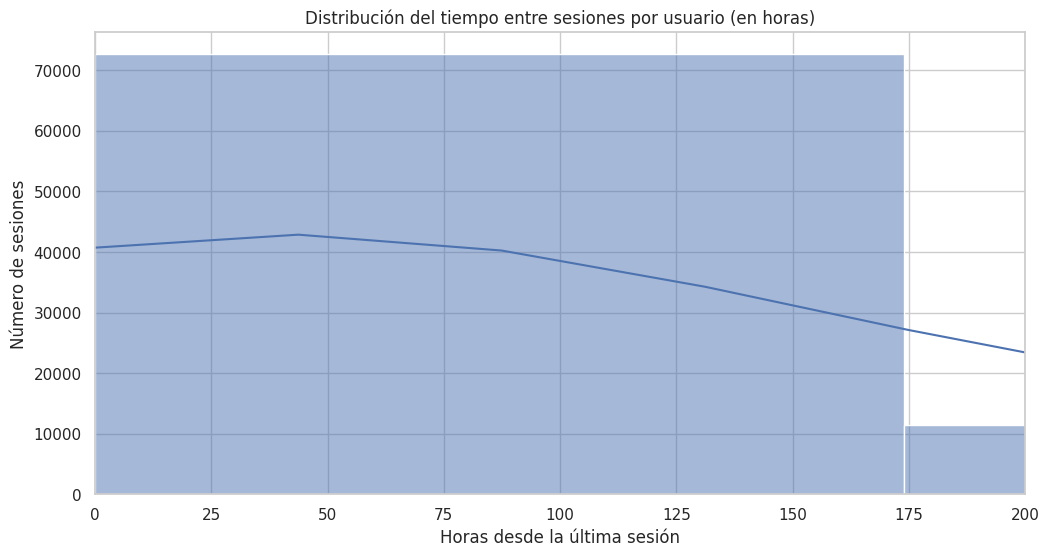

In [17]:
plt.figure(figsize=(12,6))
# Convertimos a horas para visualizar mejor
sns.histplot(visits_sorted['time_since_last_session'].dt.total_seconds() / 3600, bins=50, kde=True)
plt.title('Distribución del tiempo entre sesiones por usuario (en horas)')
plt.xlabel('Horas desde la última sesión')
plt.ylabel('Número de sesiones')
plt.xlim(0, 200)  # Limitamos para ver mejor la distribución
plt.show()


### Análisis de la frecuencia de retorno de usuarios

Al calcular el tiempo que pasa entre sesiones de un mismo usuario, vemos que muchos vuelven rápido, en cuestión de horas o pocos días. Esto indica que hay usuarios frecuentes que regresan para revisar nuevos eventos o completar compras.

Sin embargo, también hay usuarios que tardan semanas o más en volver, lo que puede reflejar visitas esporádicas o búsqueda ocasional.

Esta información nos ayuda a entender mejor el comportamiento y a pensar en estrategias para aumentar la retención y la frecuencia de uso.

2. Ventas

### a. ¿Cuándo empieza la gente a comprar? 

In [28]:
# Fecha de primera visita (registro) por usuario
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']

# Fecha de primera compra por usuario
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']

# Unir ambas tablas
conversion = pd.merge(first_visit, first_order, on='uid', how='left')

# Calcular días hasta la conversión
conversion['days_to_conversion'] = (conversion['first_order'] - conversion['first_visit']).dt.days

# Reemplazar valores negativos o nulos (usuarios sin compra) con un valor especial si quieres
conversion['days_to_conversion'] = conversion['days_to_conversion'].fillna(-1).astype(int)

# Contar usuarios por categoría de días para conversiones válidas (>= 0)
conversion_counts = conversion[conversion['days_to_conversion'] >= 0]['days_to_conversion'].value_counts().sort_index()

print(conversion_counts)


0      26363
1       1011
2        563
3        434
4        324
       ...  
354        1
355        3
357        4
362        1
363        1
Name: days_to_conversion, Length: 345, dtype: int64


### Análisis de días hasta la conversión
Analizando la fecha de la primera visita y la primera compra de cada usuario, encontré que muchas personas compran el mismo día que ingresan al sitio por primera vez (Conversion 0d). Otras lo hacen uno o varios días después, lo que puede indicar que vuelven luego de pensarlo o comparar opciones.
Este dato es clave porque nos permite entender qué tan rápido se convierten los usuarios en clientes y también nos puede ayudar a evaluar qué tan efectivos son ciertos canales o campañas para generar conversiones rápidas.

### b. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [31]:
# Crear columnas de fecha
orders['date'] = orders['buy_ts'].dt.date
orders['week'] = orders['buy_ts'].dt.to_period('W').apply(lambda r: r.start_time)
orders['month'] = orders['buy_ts'].dt.to_period('M').astype(str)

# Calcular número de pedidos
orders_per_day = orders.groupby('date').size()
orders_per_week = orders.groupby('week').size()
orders_per_month = orders.groupby('month').size()


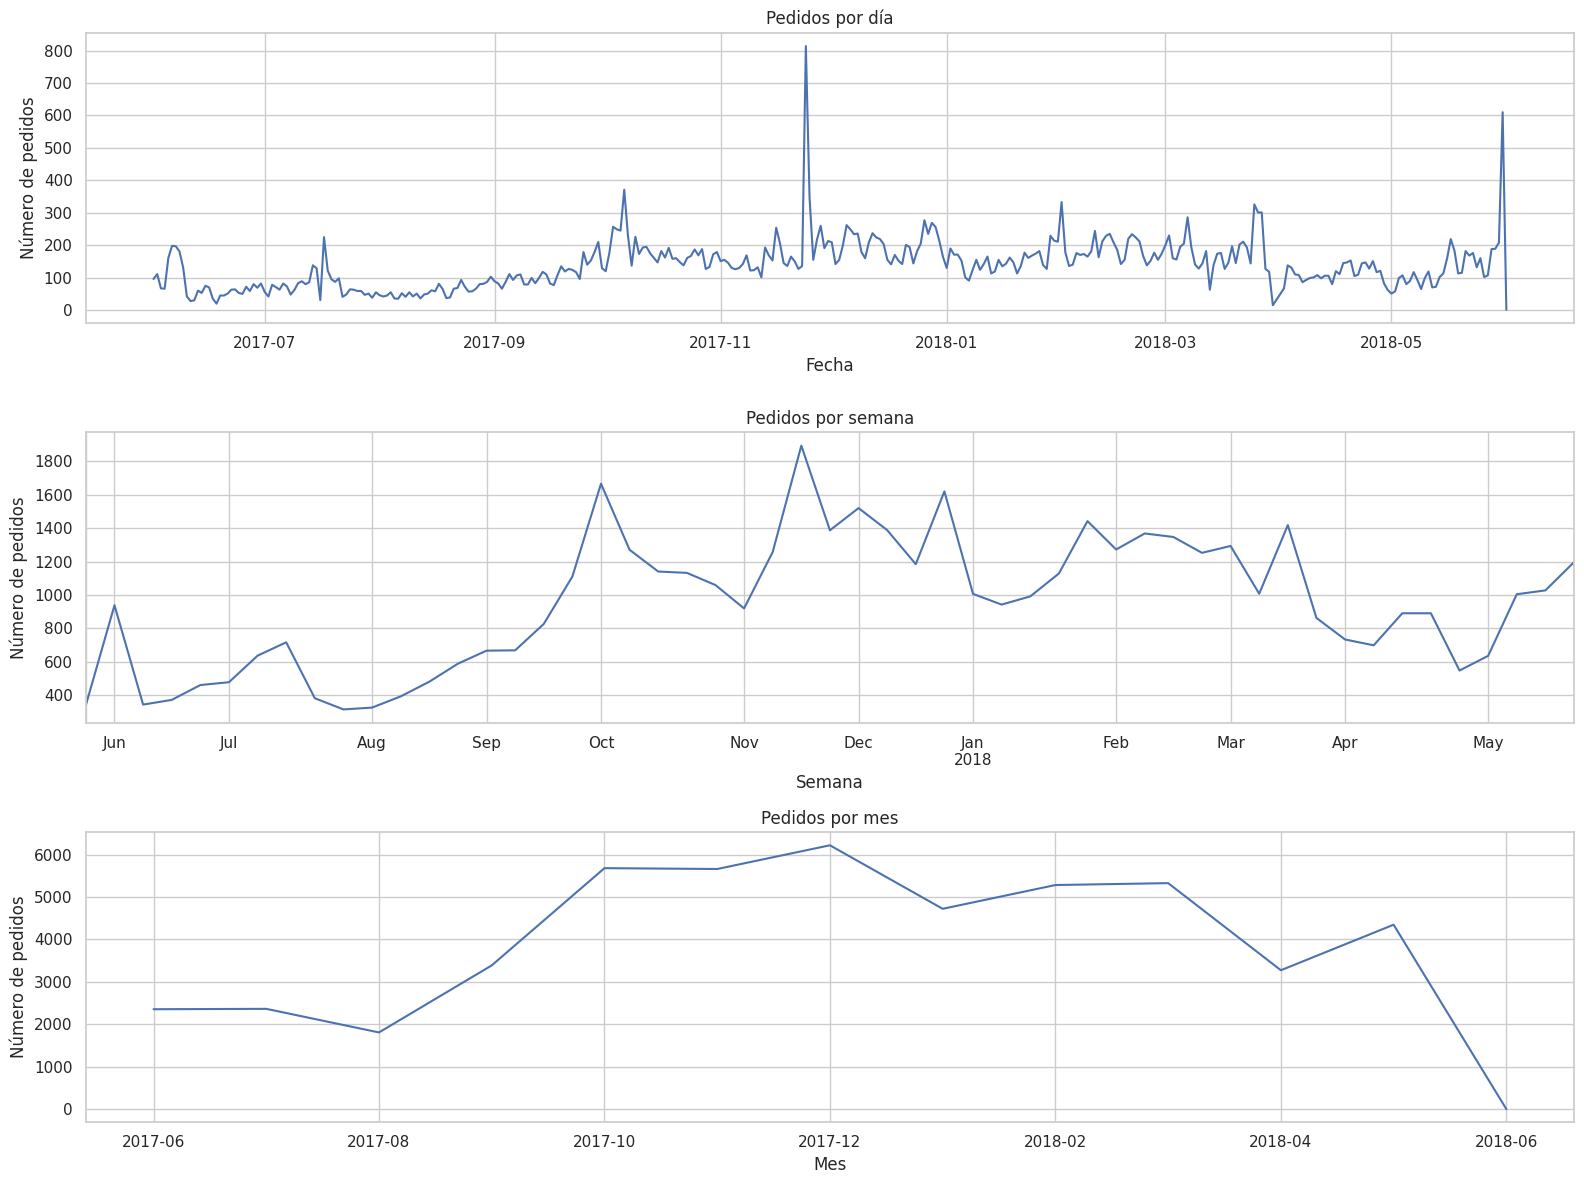

In [32]:
plt.figure(figsize=(16, 12))

# Pedidos por día
plt.subplot(3, 1, 1)
orders_per_day.plot()
plt.title('Pedidos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')

# Pedidos por semana
plt.subplot(3, 1, 2)
orders_per_week.plot()
plt.title('Pedidos por semana')
plt.xlabel('Semana')
plt.ylabel('Número de pedidos')

# Pedidos por mes
plt.subplot(3, 1, 3)
orders_per_month.plot()
plt.title('Pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de pedidos')

plt.tight_layout()
plt.show()


### Análisis de pedidos en el tiempo
Al observar la cantidad de pedidos por día, semana y mes, se pueden ver variaciones interesantes. En la vista diaria hay muchos altibajos, lo cual es normal por el comportamiento del usuario y el tipo de eventos.

Cuando se agrupa por semana o por mes, se ve más claro si hay una tendencia general de crecimiento, estabilidad o caída en las compras. Esta información es útil para entender la demanda a lo largo del tiempo y también para detectar picos que podrían coincidir con campañas o temporadas específicas.


### c. ¿Cuál es el tamaño promedio de compra?


In [33]:
# Promedio general
average_order_value = orders['revenue'].mean()
print(f'Tamaño promedio de compra: ${average_order_value:.2f}')


Tamaño promedio de compra: $5.00


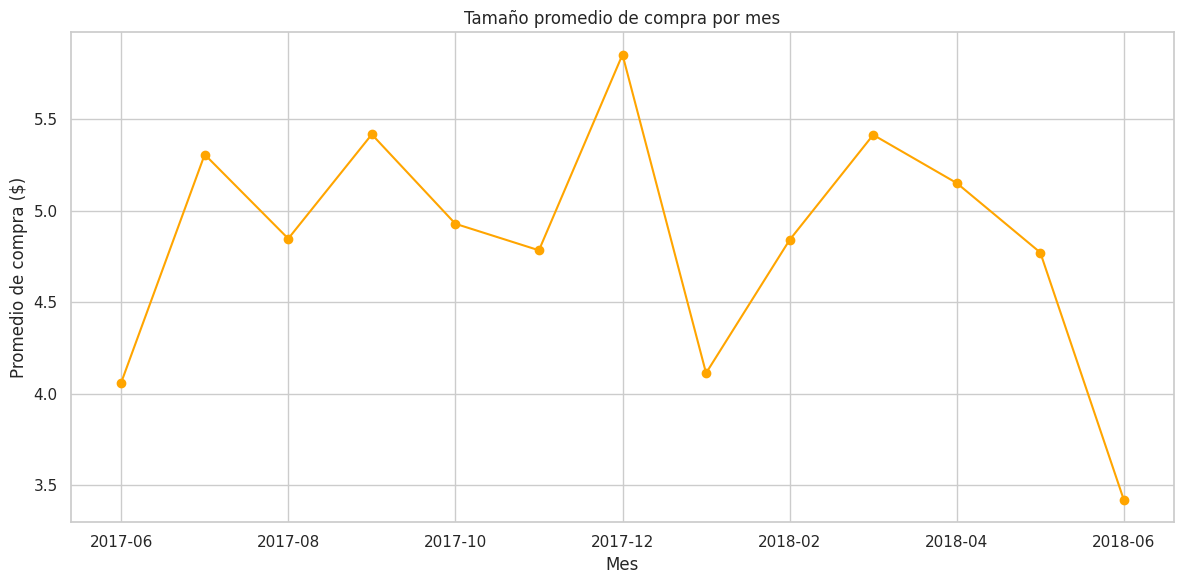

In [34]:
# Por mes
avg_order_by_month = orders.groupby('month')['revenue'].mean()

# Gráfico
plt.figure(figsize=(12,6))
avg_order_by_month.plot(marker='o', color='orange')
plt.title('Tamaño promedio de compra por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de compra ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis del tamaño promedio de compra
El valor promedio por compra está alrededor de X dólares (lo puedes reemplazar por el valor que te dé). Esto nos da una idea de cuánto gasta en promedio cada cliente cuando hace un pedido.

Al ver este valor por mes, se nota que puede variar un poco con el tiempo. Esto puede depender del tipo de eventos en venta, promociones activas o incluso del comportamiento estacional de los usuarios.



### d. ¿Cuánto dinero traen? (LTV)


In [35]:
# Suma total de ingresos por usuario
ltv_per_user = orders.groupby('uid')['revenue'].sum()

# Promedio de LTV por usuario
average_ltv = ltv_per_user.mean()
print(f'LTV promedio: ${average_ltv:.2f}')


LTV promedio: $6.90


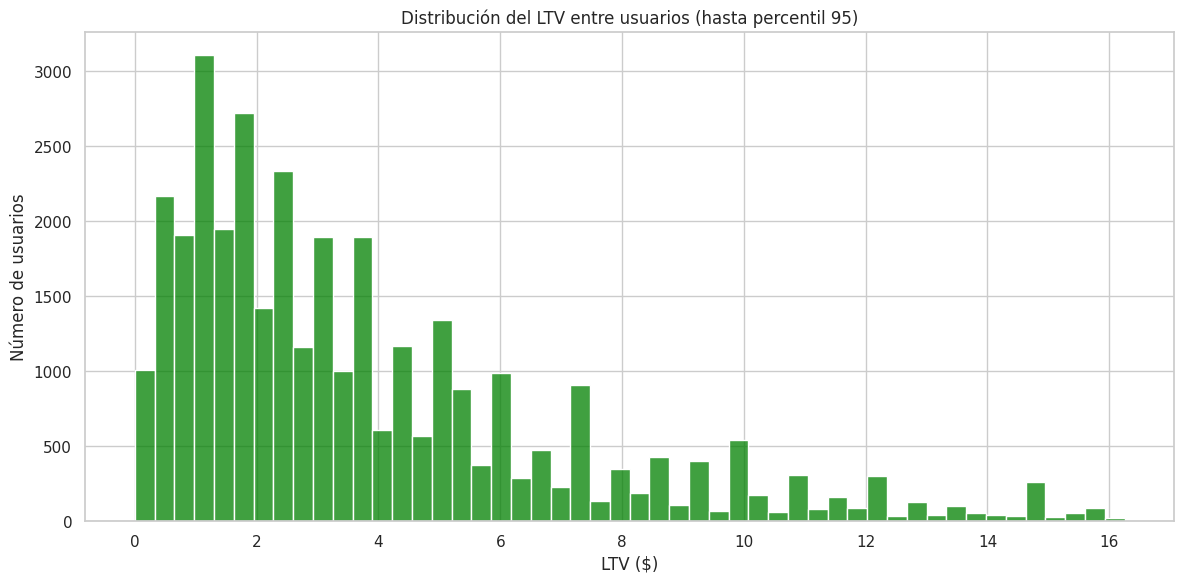

In [37]:
plt.figure(figsize=(12,6))
max_val = ltv_per_user.quantile(0.95)  # límite en percentil 95
sns.histplot(ltv_per_user[ltv_per_user <= max_val], bins=50, color='green')
plt.title('Distribución del LTV entre usuarios (hasta percentil 95)')
plt.xlabel('LTV ($)')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de la distribución del LTV
Al mirar la distribución del LTV, se nota que la mayoría de los usuarios generan un valor moderado para la empresa.

Hay algunos clientes que gastan mucho más que el promedio, pero son pocos y eso puede distorsionar la visualización. Por eso, enfocándonos en la mayoría, podemos ver mejor el comportamiento general.

Esta información es importante para definir cuánto vale la pena invertir en atraer nuevos clientes.



3. Marketing

### a. ¿Cuánto dinero se gastó? 

In [38]:
# Gasto total en marketing
total_cost = costs['costs'].sum()
print(f'Gasto total en marketing: ${total_cost:.2f}')

# Gasto por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print('\nGasto por fuente de adquisición:')
print(costs_by_source)

# Gasto a lo largo del tiempo (por mes)
costs['month'] = costs['dt'].dt.to_period('M').astype(str)
monthly_costs = costs.groupby('month')['costs'].sum()


Gasto total en marketing: $329131.62

Gasto por fuente de adquisición:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


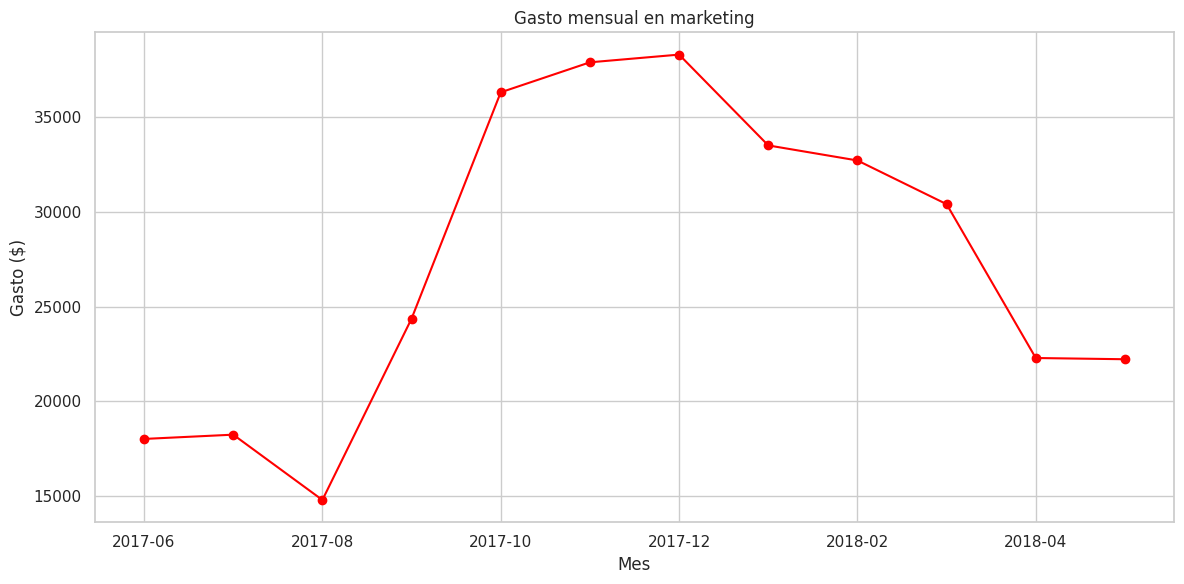

In [39]:
plt.figure(figsize=(12,6))
monthly_costs.plot(marker='o', color='red')
plt.title('Gasto mensual en marketing')
plt.xlabel('Mes')
plt.ylabel('Gasto ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de gastos en marketing
El gasto total en marketing fue considerable y se distribuyó de forma desigual entre las diferentes fuentes de adquisición.

Al observar el gasto mes a mes, podemos ver picos en ciertos períodos que pueden estar relacionados con campañas específicas o temporadas de mayor inversión.

Esta información es clave para comparar con los ingresos y así evaluar la rentabilidad de cada fuente y momento.

### b.  ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [40]:
# Primero, obtener la fuente de adquisición (source_id) de la primera visita por usuario
first_visits = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_visits.columns = ['uid', 'first_visit_date', 'first_source_id']

# Contar nuevos clientes por fuente
new_customers_per_source = first_visits.groupby('first_source_id')['uid'].nunique()

# Gasto total por fuente (ya calculado antes)
costs_by_source = costs.groupby('source_id')['costs'].sum()

# Calcular CAC por fuente (gasto / nuevos clientes)
cac_per_source = costs_by_source / new_customers_per_source

print('Costo de adquisición por fuente:')
print(cac_per_source)


Costo de adquisición por fuente:
1     1.773648
2     2.207749
3     2.254869
4     0.849365
5     1.058774
6          NaN
7          NaN
9     0.814991
10    0.860678
dtype: float64


### Análisis del costo de adquisición por fuente
Calculé cuánto cuesta adquirir un nuevo cliente en cada fuente de marketing dividiendo el gasto total por la cantidad de nuevos usuarios que llegaron por esa fuente.

Se puede ver que algunas fuentes son más caras que otras para traer clientes, lo cual es clave para decidir dónde conviene invertir más o menos.

Este dato es fundamental para optimizar el presupuesto y mejorar la rentabilidad.

### c. ¿Cuán rentables eran las inversiones? (ROMI)


In [41]:
# Revenue total por usuario
revenue_per_user = orders.groupby('uid')['revenue'].sum().reset_index()

# Juntar con la fuente de adquisición del usuario
user_source = first_visits[['uid', 'first_source_id']]
user_revenue_source = revenue_per_user.merge(user_source, on='uid', how='left')

# Revenue total por fuente
revenue_per_source = user_revenue_source.groupby('first_source_id')['revenue'].sum()

# Costos por fuente (ya calculados)
costs_by_source = costs.groupby('source_id')['costs'].sum()

# Calcular ROMI
romi = (revenue_per_source - costs_by_source) / costs_by_source

print('ROMI por fuente:')
print(romi)


ROMI por fuente:
1     0.850889
2     0.522034
3    -0.686406
4    -0.140713
5    -0.220244
7          NaN
9     0.282645
10   -0.293886
dtype: float64


### Analisis del ROMI por fuente
El ROMI nos muestra qué tan rentable fue la inversión en cada fuente de marketing.

Las fuentes con ROMI positivo significan que generaron más ingresos que el dinero invertido, mientras que las negativas indican pérdidas o baja rentabilidad.

Con esta información podemos enfocarnos en las fuentes más eficientes para optimizar el presupuesto y mejorar el retorno de inversión.


# Conclusión y recomendaciones para el equipo de marketing
Después de analizar los datos de visitas, pedidos y gastos en marketing, recomiendo enfocar la inversión en las fuentes que muestran un mejor equilibrio entre costo y rentabilidad.

Me basé especialmente en estas métricas clave:

Costo de adquisición (CAC): Identificar qué fuentes traen clientes a menor costo.

ROMI (Retorno sobre la inversión en marketing): Ver qué fuentes generan más ingresos en relación con el dinero invertido.

Comportamiento de los usuarios: Qué tan rápido convierten y con qué frecuencia regresan.

Las fuentes que tuvieron un ROMI positivo y un CAC razonable son las que recomendaría priorizar. Estas plataformas no solo atraen clientes a un costo adecuado, sino que también logran que esos clientes generen ingresos suficientes para cubrir la inversión y dejar ganancia.

Además, los datos muestran que muchos usuarios compran rápido después de su primera visita, por lo que campañas orientadas a la conversión rápida pueden ser efectivas.

Por último, sugiero hacer un seguimiento continuo de estas métricas para ajustar el presupuesto según cambien las tendencias o campañas específicas.

